In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import keras 
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

C:\Users\Harish\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()


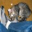
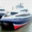
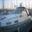
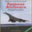
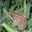
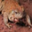
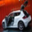
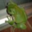
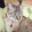
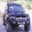
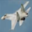
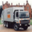
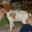
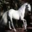
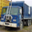
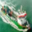
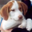
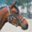
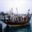
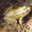
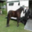
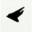
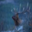
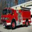
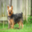
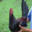
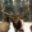
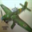
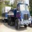
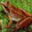
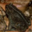
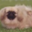
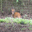
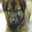
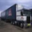
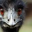
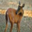
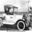
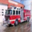
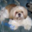
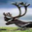
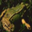
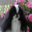
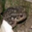
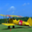
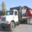
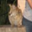
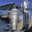
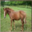
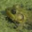
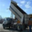
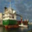
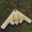
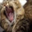
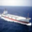
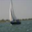
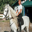
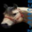
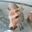
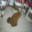
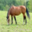
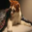
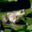
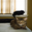
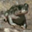
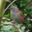
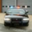
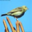
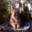
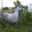
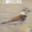
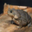
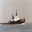
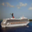
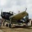
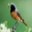
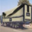
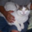
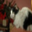
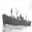
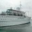
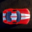
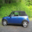
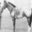
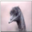
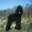
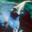
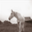
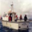
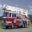
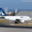
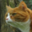
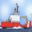
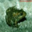
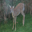
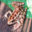
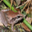
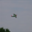
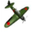
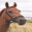
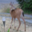
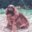
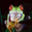
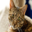
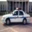
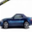
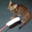
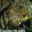
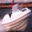
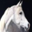
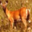
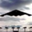
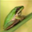
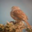
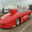
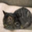
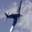
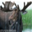
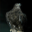
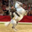
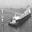
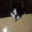
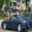
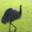
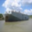
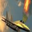
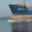
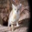
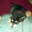
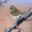
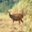
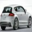
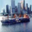
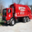
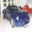
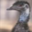
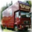
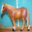
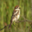
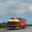
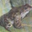
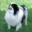
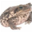
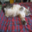
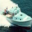
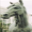
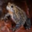
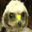
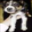
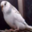
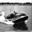
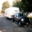
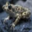
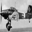
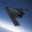
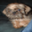
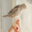
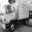
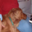
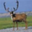
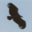
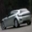
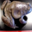
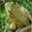
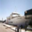
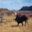
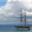
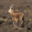
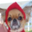
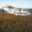
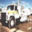
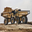
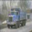
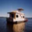
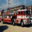
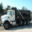
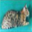
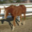
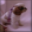
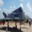
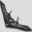
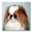
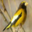
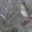
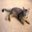
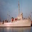
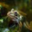
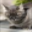
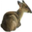
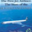
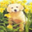
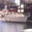
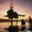
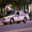
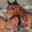
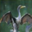
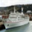
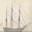
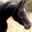
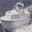


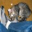
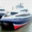
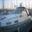
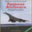
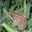
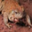
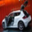
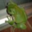
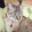
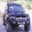
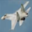
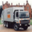
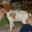
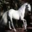
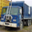
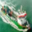
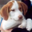
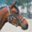
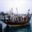
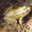
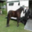
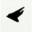
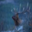
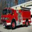
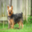
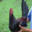
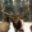
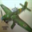
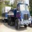
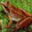
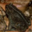
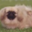
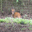
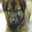
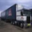
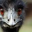
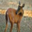
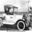
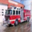
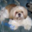
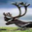
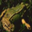
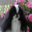
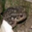
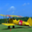
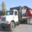
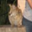
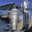
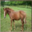
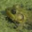
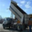
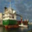
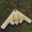
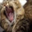
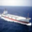
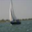
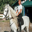
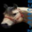
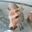
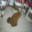
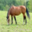
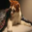
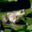
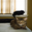
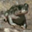
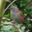
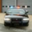
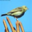
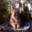
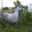
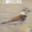
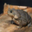
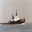
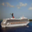
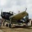
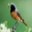
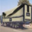
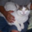
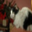
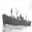
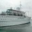
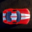
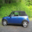
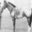
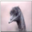
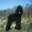
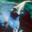
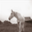
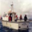
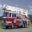
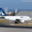
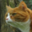
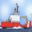
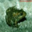
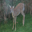
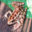
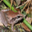
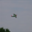
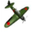
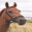
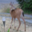
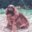
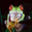
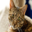
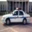
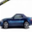
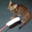
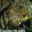
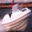
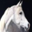
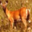
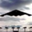
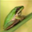
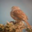
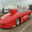
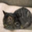
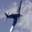
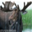
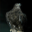
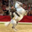
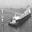
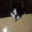
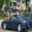
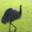
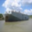
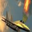
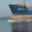
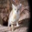
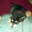
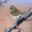
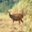
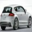
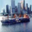
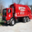
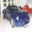
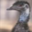
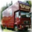
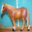
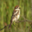
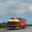
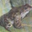
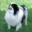
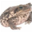
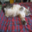
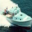
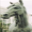
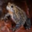
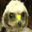
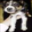
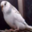
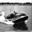
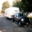
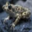
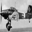
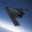
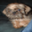
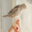
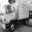
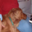
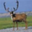
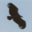
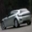
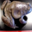
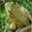
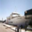
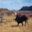
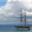
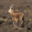
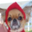
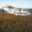
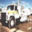
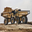
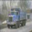
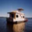
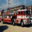
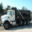
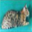
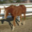
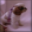
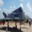
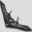
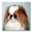
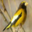
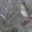
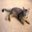
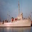
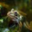
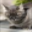
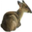
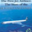
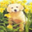
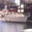
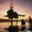
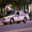
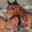
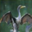
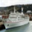
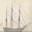
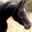
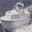

In [3]:
import ipyplot

ipyplot.plot_images(x_test, max_images=200, img_width=150)

In [4]:
print("shape of training data ::",x_train.shape)
print("shape of teseting data ::",x_test.shape)

shape of training data :: (50000, 32, 32, 3)
shape of teseting data :: (10000, 32, 32, 3)


In [5]:
import keras
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
## Mean shifting and variance centering 
mean = np.mean(x_train, axis = (0,1,2,3))
std = np.std(x_train, axis = (0,1,2,3))
x_train = (x_train-mean)/(std + 1e-7)
x_test = (x_test-mean)/(std + 1e-7)
## Converting target variable into categorical matrix
y_train_cat = keras.utils.to_categorical(y_train,10)
y_test_cat = keras.utils.to_categorical(y_test,10)

In [6]:
input_shape = (32,32,3)

In [28]:
from tensorflow.keras.layers import Conv2D , BatchNormalization,Dense ,Dropout,MaxPooling2D,Flatten,AveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers,activations
from tensorflow.keras import models,layers

In [29]:
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(activation='relu',filters = 32, kernel_size = (3,3), padding='same', input_shape = input_shape, kernel_regularizer=regularizers.l2(weight_decay)))

model.add(BatchNormalization())
model.add(Conv2D(activation='relu',filters = 32, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))

model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(activation='relu',filters = 64, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))

model.add(BatchNormalization())
model.add(Conv2D(activation='relu',filters = 64, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))

model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(activation='relu',filters = 128, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))

model.add(BatchNormalization())
model.add(Conv2D(activation='relu',filters = 128, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))

model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.4))


model.add(Flatten())

model.add(Dense(units = 10, activation = 'softmax'))

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_10 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_11 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [31]:
data_gen = ImageDataGenerator(
                 rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
                horizontal_flip=True)
data_gen.fit(x_train)

In [32]:
model.compile(loss = 'categorical_crossentropy', optimizer= keras.optimizers.Adam(learning_rate=0.002,decay = 1e-6), metrics=['accuracy'])

In [33]:
with tf.device('/device:GPU:0'):
    eph_history =model.fit(x_train ,y_train_cat,epochs=100,validation_split=0.2,batch_size=64,shuffle=True)
    


Epoch 1/125
625/625 [==============================] - 10s 15ms/step - loss: 1.9209 - accuracy: 0.4379 - val_loss: 1.5719 - val_accuracy: 0.5126
Epoch 2/125
625/625 [==============================] - 9s 14ms/step - loss: 1.2241 - accuracy: 0.6197 - val_loss: 1.0106 - val_accuracy: 0.6899
Epoch 3/125
625/625 [==============================] - 9s 14ms/step - loss: 0.9657 - accuracy: 0.6933 - val_loss: 0.9254 - val_accuracy: 0.7149
Epoch 4/125
625/625 [==============================] - 9s 14ms/step - loss: 0.8407 - accuracy: 0.7382 - val_loss: 0.7903 - val_accuracy: 0.7597
Epoch 5/125
625/625 [==============================] - 9s 14ms/step - loss: 0.7828 - accuracy: 0.7624 - val_loss: 0.7902 - val_accuracy: 0.7667
Epoch 6/125
625/625 [==============================] - 9s 14ms/step - loss: 0.7432 - accuracy: 0.7824 - val_loss: 0.7259 - val_accuracy: 0.7941
Epoch 7/125
625/625 [==============================] - 9s 14ms/step - loss: 0.7224 - accuracy: 0.7975 - val_loss: 0.7851 - val_accuracy

625/625 [==============================] - 9s 14ms/step - loss: 0.5625 - accuracy: 0.9050 - val_loss: 0.7568 - val_accuracy: 0.8584
Epoch 114/125
625/625 [==============================] - 9s 14ms/step - loss: 0.5629 - accuracy: 0.9069 - val_loss: 0.7523 - val_accuracy: 0.8617
Epoch 115/125
625/625 [==============================] - 9s 14ms/step - loss: 0.5637 - accuracy: 0.9061 - val_loss: 0.7394 - val_accuracy: 0.8634
Epoch 116/125
625/625 [==============================] - 9s 14ms/step - loss: 0.5596 - accuracy: 0.9078 - val_loss: 0.7540 - val_accuracy: 0.8575
Epoch 117/125
625/625 [==============================] - 9s 14ms/step - loss: 0.5663 - accuracy: 0.9041 - val_loss: 0.7674 - val_accuracy: 0.8540
Epoch 118/125
625/625 [==============================] - 9s 14ms/step - loss: 0.5641 - accuracy: 0.9065 - val_loss: 0.7530 - val_accuracy: 0.8624
Epoch 119/125
625/625 [==============================] - 9s 14ms/step - loss: 0.5604 - accuracy: 0.9081 - val_loss: 0.7579 - val_accuracy:

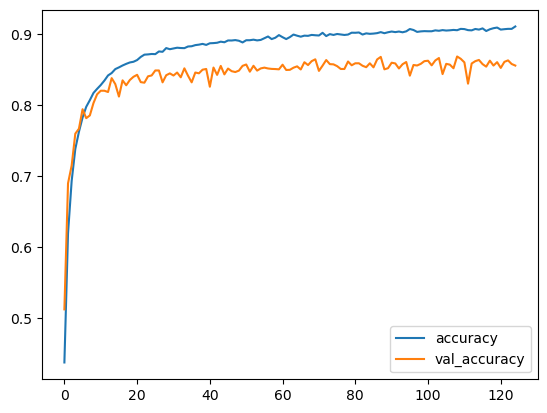

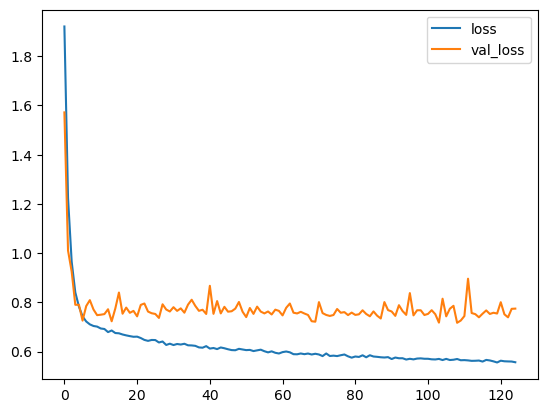

In [34]:
plt.plot(eph_history.history['accuracy'],label ='accuracy')
plt.plot(eph_history.history['val_accuracy'],label ='val_accuracy')
plt.legend()
plt.show()
plt.plot(eph_history.history['loss'],label = 'loss')
plt.plot(eph_history.history['val_loss'],label ='val_loss')
plt.legend()
plt.show()

In [35]:
model.evaluate(x_test,y_test_cat,batch_size=64,verbose=1)

157/157 [==============================] - 1s 4ms/step - loss: 0.7916 - accuracy: 0.8487


[0.791641891002655, 0.8486999869346619]

In [40]:
from keras.models import load_model
model.save('cifar_10.h5')
loaded_cifar = load_model('cifar_10.h5')
score = loaded_cifar.evaluate(x_test,y_test_cat,batch_size=64,verbose=1)

157/157 [==============================] - 1s 4ms/step - loss: 0.7916 - accuracy: 0.8487


In [43]:
print(round(score[1]*100))

85
